# LINEAR REGRESSION
A practice session

importing libraries - 

In [52]:
import numpy as np
import pandas as pd
import csv
import matplotlib.pyplot as plt
from ipywidgets import interact

Importing the dataset and arranging it in a numpy array - 

In [53]:
file = open('E:\coding\\test_python\linear regression dataset\\train.csv');
dataset_csv = csv.reader(file);

datasetX = list();
datasetY = list()
for i in dataset_csv:
     tempX = list(i)
     tempY = tempX[1];
     tempX[1] = tempX[0]
     tempX[0] = 1;
     datasetY = datasetY + [tempY]
     datasetX = datasetX + [tempX]
X = np.array(datasetX)
Y = np.array(datasetY)
X = np.delete(X, 0, 0)
X = X.astype(float)
Y = np.delete(Y, 0, 0)
Y = Y.astype(float)

important variables and plots - 

In [54]:
m = X.shape[0]
theta = np.random.rand(1,2)
theta = np.array([[0,0]])

ogtheta = theta
J = 0
alpha = 1

In [55]:
def plotstuff(X, Y, theta):
     Yline = np.linspace(min(X[:,1]),max(X[:,1]))
     Xline = np.ones(Yline.shape)
     for itr in range(len(Yline)):
          Xline[itr] = Yline[itr] * theta[0,1] + theta[0,0] 
     plt.scatter(X[:,1], Y, c="blue")
     plt.plot(Xline, Yline, c="red")
     #plt.show()

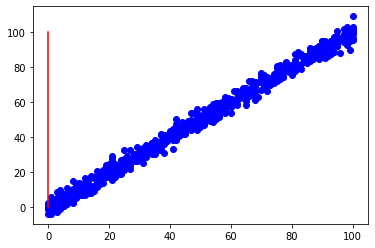

In [56]:
plotstuff(X,Y,theta)

cost function and gradient descent - 

In [57]:
def calculatecost(X, theta):
     cost = 0
     for itr in range(len(X)):
          cost += (np.sum(X[itr,:] * theta) - Y[itr]) ** 2    
     cost = (1 / m) * cost;
     return cost

In [58]:
def gradientdescentandplot(X, theta, alpha):
     J = 0
     for i in range(50):
          c = np.zeros((1,2))
          for j in range(len(X)):
               c[0,1] += (np.sum(X[j,:] * theta) - Y[j]) * X[j,1]
               c[0,0] += (np.sum(X[j,:] * theta) - Y[j])
               #print(c)
          theta = theta - (alpha / m) * c
          #print(J)
          J = calculatecost(X, theta)
          plt.scatter(i, J, c='red')
     return theta

Other functions - 

In [59]:
def compare(X, ogtheta, theta):
     plt.subplot(1,2,1)
     plotstuff(X,Y,ogtheta)
     plt.subplot(1,2,2)
     plotstuff(X,Y,theta)
     plt.show()

In [60]:
def userinputornot(theta):
     theta = np.array([[0, 0]])
     if input("input theta, esc for random values"):
          theta[0,0], theta[0,1] = input().split()
     else:
          theta = np.random.rand(1,2)
     return theta

Driver code - 

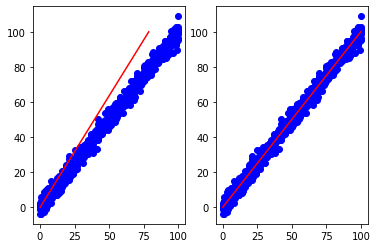

In [61]:
theta = np.random.rand(1,2)
ogtheta = theta
theta = gradientdescentandplot(X, theta, 0.0001)
compare(X, ogtheta, theta)

In [49]:
xin = input("Enter value = ")
xin = np.array(xin, dtype=float)
print(theta[0,1].dtype, xin.dtype)
yin = theta[0,0] + theta[0,1] * xin
print("Predicted yvalue = ", yin)

float64 float64
Predicted yvalue =  10.053951147490597


inputting test set - 

In [50]:
file = open("E:\coding\\test_python\linear regression dataset\\test.csv")
dataset_test_csv = csv.reader(file)
dataset_test = list()
for i in dataset_test_csv:
     dataset_test = dataset_test + [i]
dataset_test = np.array(dataset_test)
dataset_test = np.delete(dataset_test, 0, 0)
dataset_test = dataset_test.astype(float)
Xtest = np.ones(dataset_test.shape)
Xtest[:,1] = dataset_test[:,0]
Ytest = dataset_test[:,1]

checking predictions in the test set - 

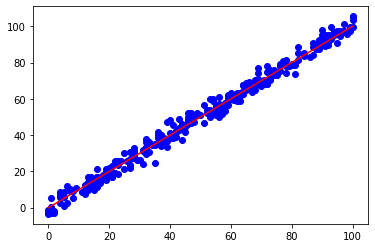

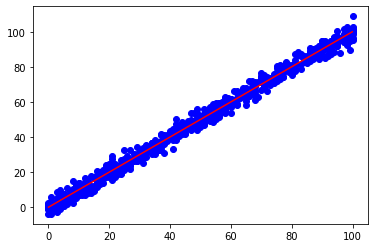

In [51]:
plotstuff(Xtest, Ytest, theta)
plt.show()
plotstuff(X, Y, theta)
plt.show()